In this kernal we will go through the whole process of creating a Machine Learning Model on Heart Disease dataset. It will predict the patients which can survive by considering various features.

# Loading Necessary Libraries & packages

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
heart_data=pd.read_csv("heart_data")

In [5]:
heart_data

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,345,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
346,346,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
347,347,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
348,348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


# Steps To build ML Model

# Getting your data ready

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  350 non-null    int64  
 1   age         350 non-null    int64  
 2   sex         350 non-null    int64  
 3   cp          350 non-null    int64  
 4   trestbps    350 non-null    int64  
 5   chol        350 non-null    int64  
 6   fbs         350 non-null    int64  
 7   restecg     350 non-null    int64  
 8   thalach     350 non-null    int64  
 9   exang       350 non-null    int64  
 10  oldpeak     350 non-null    float64
 11  slope       350 non-null    int64  
 12  ca          350 non-null    int64  
 13  thal        350 non-null    int64  
 14  target      350 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 41.1 KB


In [6]:
heart_data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,350.000000,350.0000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.00000,350.000000
mean,174.500000,53.5200,0.720000,0.988571,132.185714,247.151429,0.160000,0.500000,150.514286,0.348571,1.039429,1.428571,0.731429,2.30000,0.537143
std,101.180532,9.4234,0.449642,1.007073,18.249852,54.976759,0.367131,0.523105,23.605487,0.477200,1.207137,0.623591,1.030695,0.62768,0.499332
min,0.000000,29.0000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,87.250000,46.0000,0.000000,0.000000,120.000000,209.250000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,2.00000,0.000000
50%,174.500000,54.0000,1.000000,1.000000,130.000000,243.500000,0.000000,0.000000,152.000000,0.000000,0.800000,1.500000,0.000000,2.00000,1.000000
75%,261.750000,60.0000,1.000000,2.000000,140.000000,282.000000,0.000000,1.000000,169.000000,1.000000,1.600000,2.000000,1.000000,3.00000,1.000000
max,349.000000,77.0000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.00000,1.000000


In [7]:
#missing values.......machine learning doesn't perform on missing or object data type values 
heart_data.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [8]:
heart_data.isna().any()

Unnamed: 0    False
age           False
sex           False
cp            False
trestbps      False
chol          False
fbs           False
restecg       False
thalach       False
exang         False
oldpeak       False
slope         False
ca            False
thal          False
target        False
dtype: bool

In [9]:
heart_data.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target          int64
dtype: object

In [10]:
heart_data.dropna()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,345,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
346,346,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
347,347,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
348,348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [6]:
#create x
x= heart_data.drop("target", axis=1)

#create y
y=heart_data["target"]


# Chosing Machine Learning model
This diagram help in chosing machine learning models 

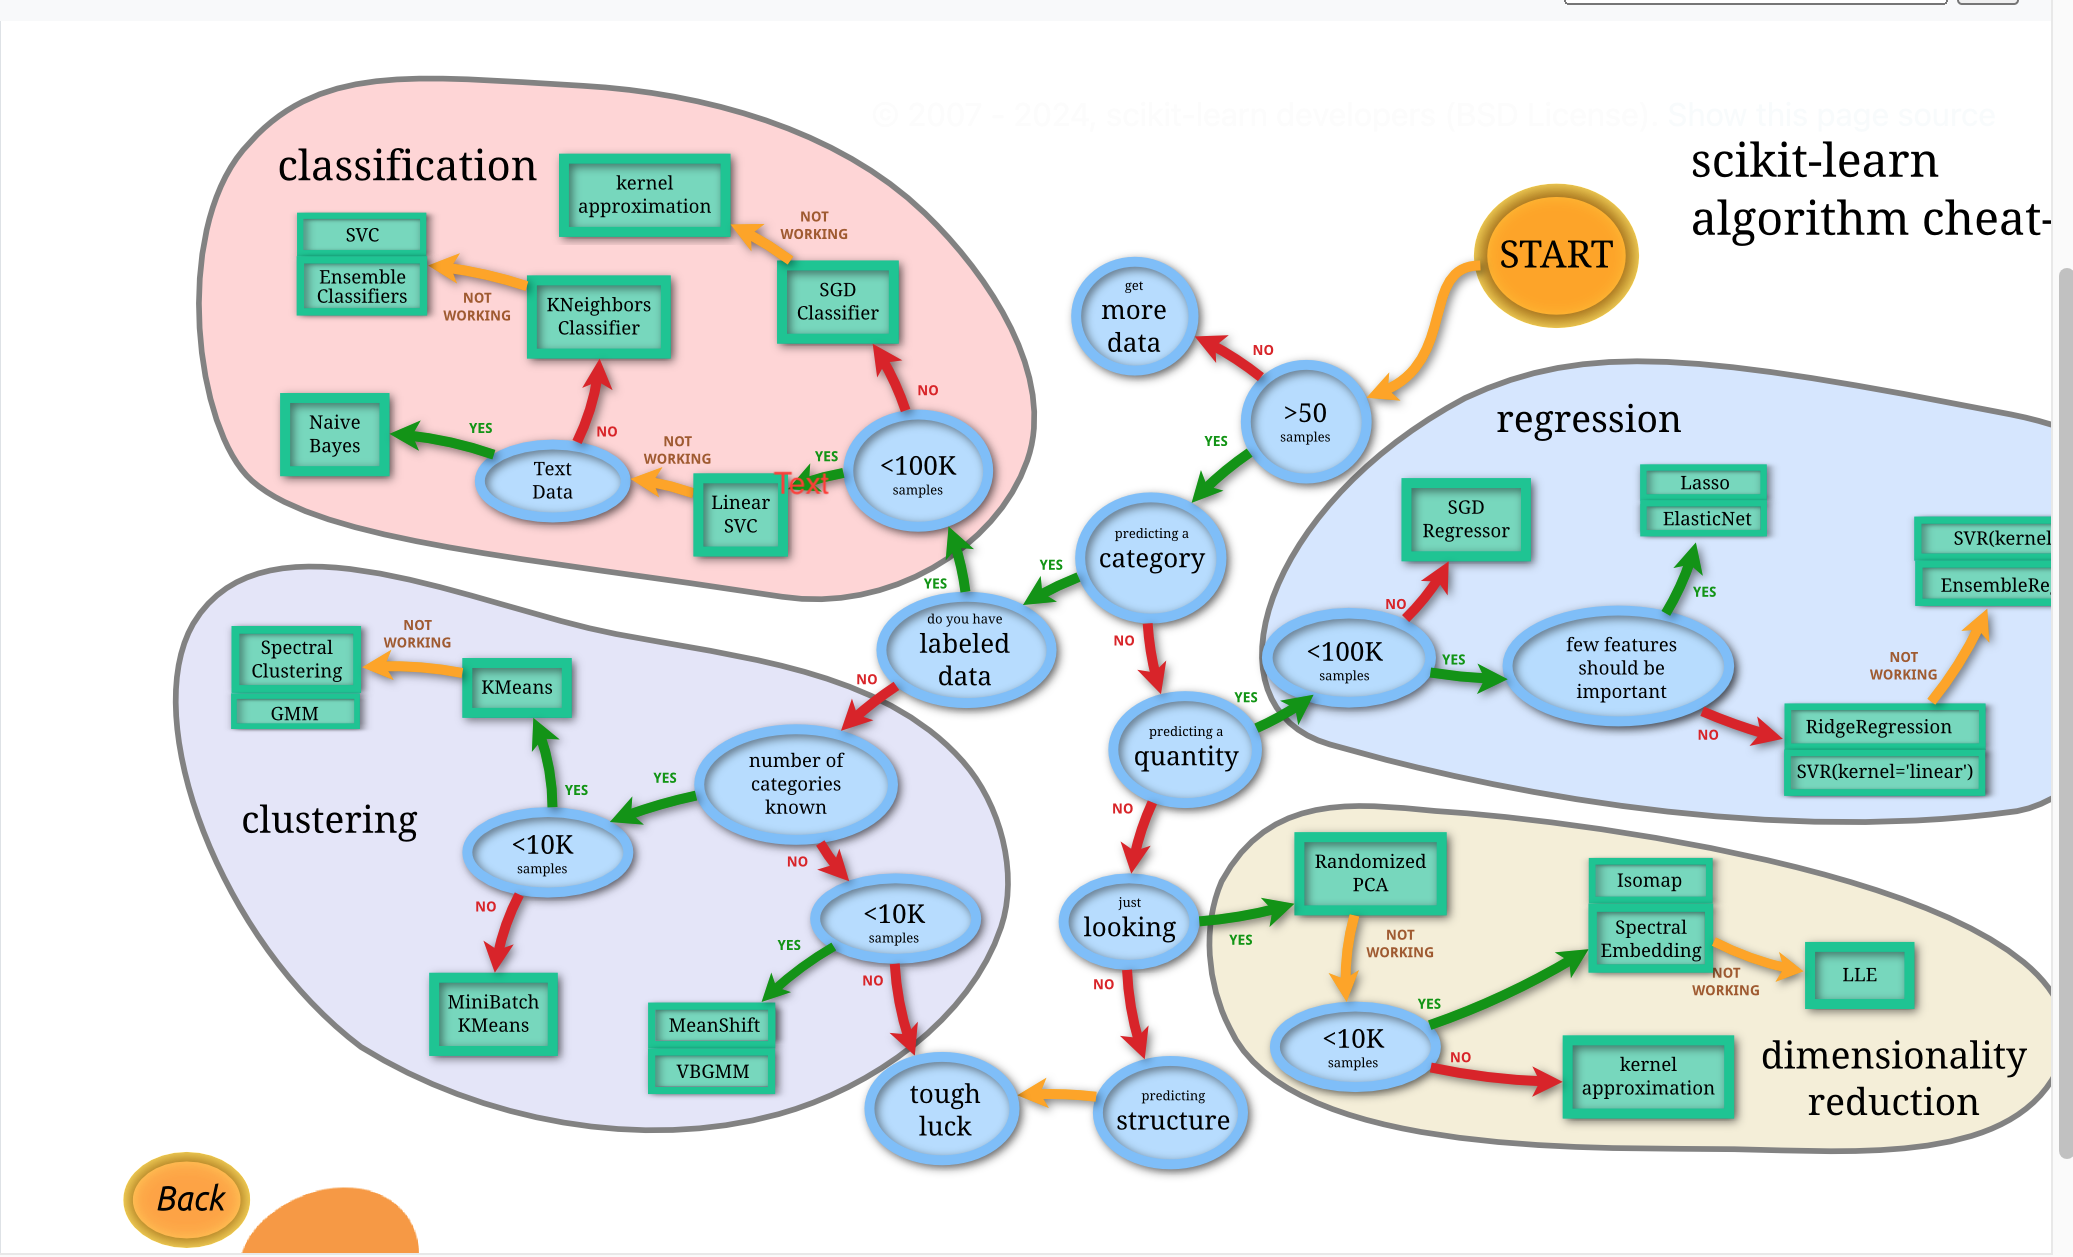

# Classification Model  

In [7]:
# we imported SVC linear model

from sklearn.svm import LinearSVC
import numpy as np
from sklearn.model_selection import train_test_split

#  To reproduce same result with fellow Ml scientist
np.random.seed(1)
# create data
x= heart_data.drop("target", axis=1)
y=heart_data["target"]
# split data into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
# instantiating Linear SVC model
svm_model = LinearSVC()
svm_model.fit(x_train,y_train)
#check ther score of the model
svm_model.score(x_test,y_test)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7047619047619048

# Improve model by chosing better model

In [8]:
# improving ML model by chosing better model

# we imported RandomForestClassifier model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#  To reproduce same result with fellow Ml scientist
np.random.seed(1)
# create data
x= heart_data.drop("target", axis=1)
y=heart_data["target"]
# split data into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
# instantiating RandomForestClassifier model
RFC_model = RandomForestClassifier()
RFC_model.fit(x_train,y_train)
#check ther score of the model
RFC_model.score(x_test,y_test)

0.8857142857142857

# Actual vs Predicted

In [9]:
## Evaluating model

y_predicted = RFC_model.predict(x_test)
y_predicted[:5]    # predicted values

array([1, 1, 1, 0, 1])

In [10]:
Actual_values = np.array(y_test)  # Actual values
Actual_values[:5]

array([1, 1, 1, 0, 1])

In [11]:
np.mean(y_predicted == Actual_values)

0.8857142857142857

In [12]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_predicted)

0.8857142857142857

In [13]:
#check ther score of the model
RFC_model.score(x_test,y_test)

0.8857142857142857

Checked same thing with three differnt methods and result is same 

# Predict  & predict_proba

In [14]:
## 2 ways to run a prediction
# predict 
# predict_proba

In [15]:
# get 5 values using [:5]
y_predicted = RFC_model.predict(x_test)[:5]
y_predicted

array([1, 1, 1, 0, 1])

In [16]:
RFC_model.predict_proba(x_test)[:5]

array([[0.29, 0.71],
       [0.21, 0.79],
       [0.21, 0.79],
       [0.8 , 0.2 ],
       [0.04, 0.96]])

predict simply predict value and tell whether it's 0 or 1.  if value is above 0.5 it return value as 1 and if it's value is less than 0.5 it returns 0 but proba method tells the actal percentage of the value like how much chances are that it would be 1 or 0. It is more reliable and accurate one and gives more confidence.

# Evaluating Machine Learning Model

In [17]:
RFC_model.score(x_test,y_test)

0.8857142857142857

# Cross validation 

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(RFC_model, x,y, cv=5, scoring =None)

array([0.87142857, 0.94285714, 0.95714286, 0.9       , 0.94285714])

In [19]:
RFC_model.score(x_test,y_test), np.mean(cross_val_score(RFC_model, x,y, cv=5, scoring =None))

(0.8857142857142857, 0.9314285714285713)

Cross validation works on splitting strategy and apply all combinations to get better results as you can see in the example  

# Classification Model Evaluation

In [20]:
#Accuracy
print(f"Heart disease data cross_val_accuracy: {np.mean(cross_val_score(RFC_model, x,y, cv=5, scoring =None))*100:.2f}%")

Heart disease data cross_val_accuracy: 92.00%


# 2-Area under the Curve (AUC)
Receiver operating charactersistic (ROC)

In [21]:
from sklearn.metrics import roc_curve
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
# Fit the model
RFC_model.fit(x_train,y_train)

# make predictions using predict proba
y_proba = RFC_model.predict_proba(x_test)
y_proba[:5]

array([[0.02, 0.98],
       [0.9 , 0.1 ],
       [0.12, 0.88],
       [0.72, 0.28],
       [0.19, 0.81]])

In [22]:
y_prob_positive = y_proba[:,1]


In [23]:
#case_1: True positive  : Actual =1 and predicted =1
#case_2: False positive : Actual =0 and predicted =1
#case_3: True negative  : Actual =0 and predicted =0
#case_4: False negative : Actual =1 and predicted =0

In [24]:
# Calculate fpr, tpr, threshold
fpr, tpr, threshold = roc_curve(y_test, y_prob_positive)

In [25]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0212766 ,
       0.0212766 , 0.0212766 , 0.06382979, 0.06382979, 0.12765957,
       0.12765957, 0.12765957, 0.12765957, 0.14893617, 0.14893617,
       0.14893617, 0.21276596, 0.21276596, 0.27659574, 0.31914894,
       0.31914894, 0.36170213, 0.40425532, 0.44680851, 0.53191489,
       0.59574468, 0.61702128, 0.70212766, 0.74468085, 0.78723404,
       0.82978723, 0.91489362, 1.        ])

In [26]:
tpr

array([0.        , 0.0862069 , 0.15517241, 0.27586207, 0.31034483,
       0.37931034, 0.4137931 , 0.43103448, 0.48275862, 0.51724138,
       0.55172414, 0.62068966, 0.63793103, 0.67241379, 0.68965517,
       0.74137931, 0.81034483, 0.81034483, 0.82758621, 0.82758621,
       0.86206897, 0.87931034, 0.9137931 , 0.9137931 , 0.94827586,
       0.96551724, 0.96551724, 0.98275862, 0.98275862, 0.98275862,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

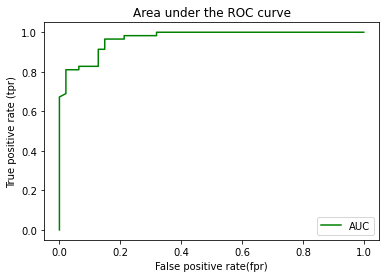

In [27]:
def plot_roc(fpr, tpr):
    plt.plot(fpr,tpr, color = "green",label = "AUC")
    
    # customize the plot
    plt.title("Area under the ROC curve")
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.legend()
    plt.show()
plot_roc(fpr,tpr)

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob_positive)*100

96.82685253118122

# 3-Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

y_predicted = RFC_model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[39,  8],
       [ 2, 56]])

In [30]:
len(y_test)

105

In [31]:
#case_1: True positive  : Actual =1 and predicted =1
#case_2: False positive : Actual =0 and predicted =1
#case_3: True negative  : Actual =0 and predicted =0
#case_4: False negative : Actual =1 and predicted =0

In [32]:
#To better visualize 
pd.crosstab(y_test, y_predicted,
           rownames = ["yes"],
        colnames = ["predicted"])

predicted,0,1
yes,,
0,39,8
1,2,56


In a the above dataframe  8 and 2 are the cases where our model is confused and give  8 False positive and 2 false negaive results.  

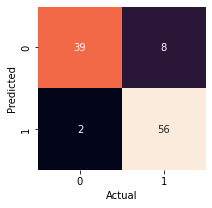

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_matrix,
                     annot=True,
                     cbar=False)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

# Assuming y_test and y_predicted are defined
conf_matrix = confusion_matrix(y_test, y_predicted)
plot_conf_matrix(conf_matrix)


# 4-Classification report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        47
           1       0.88      0.97      0.92        58

    accuracy                           0.90       105
   macro avg       0.91      0.90      0.90       105
weighted avg       0.91      0.90      0.90       105



# Classification Metric Functions

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#  To reproduce same result with fellow Ml scientist
np.random.seed(1)

# create data
x= heart_data.drop("target", axis=1)
y=heart_data["target"]

# split data into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# instantiating RandomForestClassifier model
RFC_model = RandomForestClassifier()

#Fit the model
RFC_model.fit(x_train,y_train)

#check ther score of the model
y_predicted = RFC_model.predict(x_test)

print("Model Evaluation using SKlearn Functions")

def evaluate_hyper_params(y_test, y_predicted):
    
    """this function return evaluation metrics"""
    
    accuracy = accuracy_score(y_test, y_predicted) 
    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    
    metrics_dict = {"Accuracy_score":accuracy,
                   "precision_score": precision,
                   "recall_score": recall,
                   "f1_score":f1 }
    print(f"Accuracy score: {accuracy:.2f}")
    print(f"Precision score: {precision:.2f}")
    print(f"Recall score: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metrics_dict
evaluate_hyper_params(y_test, y_predicted)

Model Evaluation using SKlearn Functions
Accuracy score: 0.89
Precision score: 0.86
Recall score: 0.95
F1 score: 0.90


{'Accuracy_score': 0.8857142857142857,
 'precision_score': 0.8571428571428571,
 'recall_score': 0.9473684210526315,
 'f1_score': 0.9}

# Model Tuning with Hyper parameters 

In [36]:

# split into x and y
x = heart_data.drop("target", axis=1)
y = heart_data["target"]

# splitting data into three parts now: train =70%, validate =15%, test =15%
train_split = round(0.7* len(heart_data))
valid_split = round(train_split + 0.15*len(heart_data))

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test   = x[valid_split:], y[valid_split:]

In [37]:
len(heart_data)

350

In [38]:
# splitted 70% ,15% and 155

len(x_train),len(x_valid), len(x_test)

(245, 53, 52)

In [39]:
RFC_model = RandomForestClassifier()
RFC_model.fit(x_train,y_train)

# baseline prediction
y_predicted = RFC_model.predict(x_valid)

## First model result
first_result = evaluate_hyper_params(y_valid, y_predicted)

Accuracy score: 0.89
Precision score: 0.96
Recall score: 0.84
F1 score: 0.90


In [40]:

# second model result

np.random.seed(7)
RFC_model2 = RandomForestClassifier(n_estimators=100,max_depth =10)
RFC_model2.fit(x_train,y_train)

# baseline prediction
y_predicted = RFC_model2.predict(x_valid)

## second model result
second_result = evaluate_hyper_params(y_valid, y_predicted)

Accuracy score: 0.83
Precision score: 0.90
Recall score: 0.81
F1 score: 0.85


# Tuning Hyper Parameters using Randomized Search CV (RSCV)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(2)
# Define parameters
hparams = {"max_depth":[None,10,15,25,50,100], 
            "n_estimators":[10,100,150,200,500,1000],
            "min_samples_split":[2,4,6],
            "min_samples_leaf" :[1,2,4],
            "max_features" :["auto", "sqrt"]}
# create data
x = heart_data.drop("target", axis=1)
y = heart_data["target"]

# split data into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

RFC_model = RandomForestClassifier(n_jobs=1) ## To use full processing capacity we use "n_jobs"

In [42]:
from sklearn.model_selection import RandomizedSearchCV
RFC_rscv = RandomizedSearchCV(estimator =RFC_model,
                             param_distributions = hparams,
                             n_iter=10,
                             cv=5,
                             verbose=2) # To show output
RFC_rscv.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 10, 15, 25, 50,
                                                      100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 150, 200, 500,
                                                         1000]},
                   verbose=2)

In [45]:
# To get best combinations
RFC_rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [46]:
#Running predictions
rscv_y_predict = RFC_rscv.predict(x_test)

#Evaluating the predictions
third_result = evaluate_hyper_params(y_test, rscv_y_predict)

Accuracy score: 0.91
Precision score: 0.86
Recall score: 0.97
F1 score: 0.91


# Tuning Hyper Parameters using Grid Search Cross Validation (GSCV)

In [47]:
from sklearn.model_selection import GridSearchCV

hparams2 = {"max_depth":[10,50,100], 
            "n_estimators":[10,50,100],
            "min_samples_split":[2,4],
            "min_samples_leaf" :[1,2],
            "max_features" :["auto","sqrt"]}
RFC_gscv = GridSearchCV(estimator =RFC_model,
                             param_grid = hparams2,
                             cv=5,
                             verbose=2) # To show output
RFC_gscv.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [49]:
RFC_gscv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 50}

In [52]:
gscv_y_predict = RFC_gscv.predict(x_test)
#Evaluation
fourth_result = evaluate_hyper_params(y_test, gscv_y_predict)

Accuracy score: 0.93
Precision score: 0.89
Recall score: 0.97
F1 score: 0.93


<AxesSubplot:>

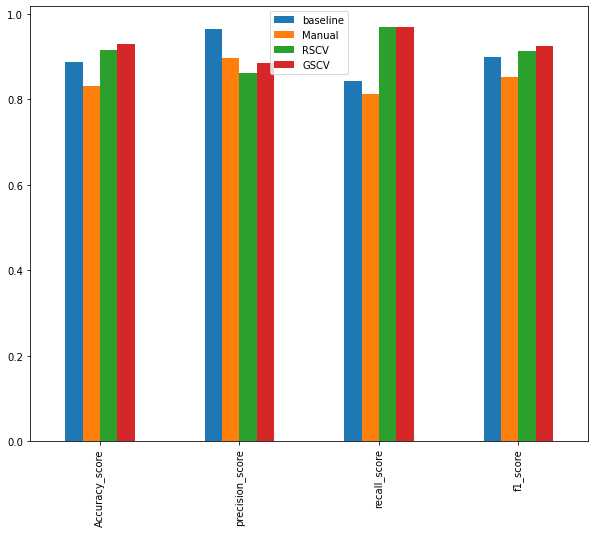

In [53]:
comparison = pd.DataFrame({"baseline" :first_result,
                           "Manual": second_result,
                           "RSCV": third_result,
                           "GSCV" : fourth_result})
                           
comparison.plot.bar(figsize =(10,8))

# Save Model

In [54]:
import pickle
# save existing model
pickle.dump(RFC_gscv,open("Heart_disease_predictor_gscv.pkr","wb"))

# Running predictions

In [64]:
pickle_model = pickle.load(open("Heart_disease_predictor_gscv.pkr","rb"))
predicted_pickle= pickle_model.predict(x_test)
predicted_pickle

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0])

In [56]:
evaluate_hyper_params(y_test,predicted_pickle )

Accuracy score: 0.93
Precision score: 0.89
Recall score: 0.97
F1 score: 0.93


{'Accuracy_score': 0.9285714285714286,
 'precision_score': 0.8857142857142857,
 'recall_score': 0.96875,
 'f1_score': 0.9253731343283582}